<a href="https://colab.research.google.com/github/nicoavilan/Metodos-Numericos/blob/main/Metodo-de-Euler/Atractor_Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Atractor de Lorenz**

En esta entrada se genera la solución del sistema de ecuaciones propuesto originalmente por *Edward Lorenz* en su artículo [Deterministic Nonperiodic Flow](https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml?tab_body=pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y,z):
  return a*(y-x)

def g(x,y,z):
  return x*(b-z)-y

def j(x,y,z):
  return x*y-c*z

a = 10
b = 28
c = 8/3

tf=50
N=10**4
h=tf/N


t=np.linspace(0,tf,N)
x = [0.1]
y = [0.1]
z = [25]

for n in range(N-1):
  x.append(x[n]+h*f(x[n],y[n],z[n]))
  y.append(y[n]+h*g(x[n],y[n],z[n]))
  z.append(z[n]+h*j(x[n],y[n],z[n]))

print("Soluciones calculadas.")

Soluciones calculadas.


Las gráfica de las soluciones del sistema de ecuaciones es

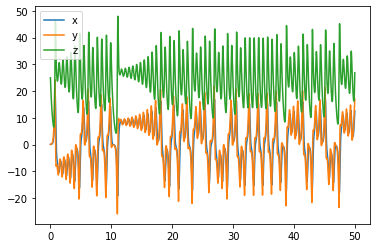

In [3]:
plt.plot(t,x,label="x")
plt.plot(t,y,label="y")
plt.plot(t,z,label="z")
plt.legend()
plt.show()

El resultado más conocido de este sistema se conoce como el **atractor de Lorenz**.

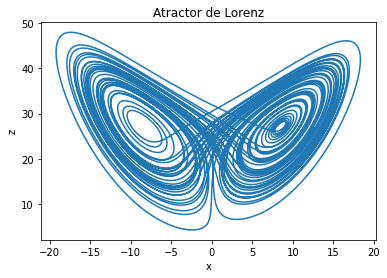

In [4]:
plt.plot(x,z)
plt.title("Atractor de Lorenz")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

Las gráficas del otro par de variables es 

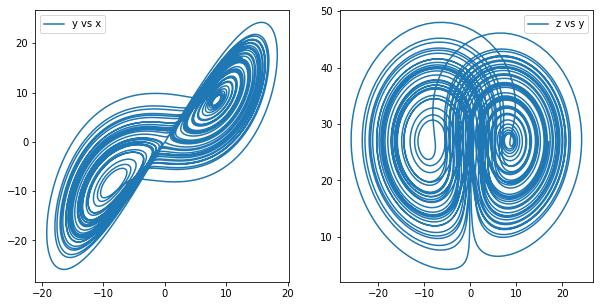

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y,label="y vs x")
plt.legend()

plt.subplot(1,2,2)
plt.plot(y,z,label="z vs y")
plt.legend()
plt.show()

Gráfica 3D

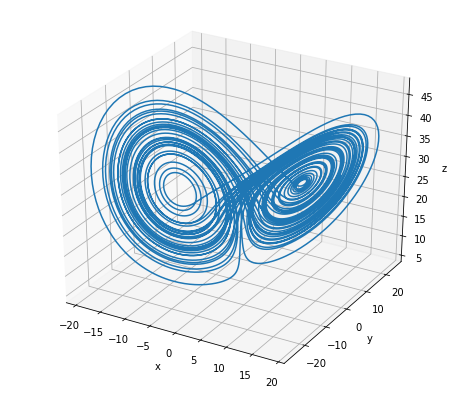

In [6]:
fig = plt.figure(figsize= (8,7))
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Al usar la librería [plotly](https://plotly.com/python/) se puede obtener una gráfica interactiva en la que es posible ver la gráfica 3D desde diferentes perspectivas.

Cargo la librería plotly

In [7]:
import plotly.graph_objects as go

In [8]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
    marker = dict(
        size=1, # Define el tamaño de cada punto en la gráfica
        color=z, # Ajusta el color de acuerdo a la coordenada z
        colorscale='Viridis'))])

fig.show()

Es muy interesante observar la evolución de las variables para la construcción del **atractor de Lorenz**. Para ello se realiza la siguiente animación

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

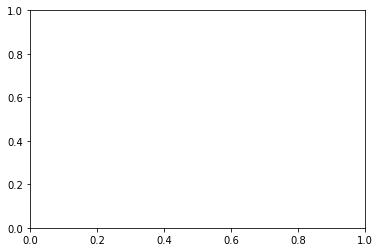

In [10]:
fig=plt.figure()
ax=fig.gca()

def actualizar(i):
  ax.clear()

  ax.plot(x[:i], z[:i],'-')
  ax.set_title("Atractor de Lorenz")
  ax.plot(x[i],  z[i],'o',markersize=10,color='r')
  

In [11]:
ani=animation.FuncAnimation(fig, actualizar, range(0,N,30), interval=200)
HTML(ani.to_html5_video())

La animación se observa al ejecutar el código, GitHub no la genera automáticamente.